In [1]:
import numpy as np
import pandas as pd
import datetime

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_path = "../data/"
ipt_file1 = "twitter_users.xlsx"
ipt_file2 = "twitter_tweets.xlsx"
ipt_file3 = "yelp_review_checkin.xlsx"

In [3]:
def func_scaling(list_value, list_id, bd=1.5):
    if len(list_value) != len(list_id):
        print("Lists size error")
        return
    
    q1 = np.percentile(list_value, 25)
    q3 = np.percentile(list_value, 75)
    iqr = q3 - q1
    bd_l = q1 - bd*(iqr)
    bd_u = q3 + bd*(iqr)

    bd_value = []
    del_id   = []
    for idx in np.arange(len(list_value)):
        if (list_value[idx] <= bd_u) and (list_value[idx] >= bd_l):
            bd_value.append(list_value[idx])
        else:
            del_id.append(list_id[idx])

    return(bd_value, del_id)

# Twitter Follower Analysis

In [4]:
df_users = pd.read_excel(data_path+ipt_file1)
df_users.head()

,Business_id,twitter_account,name,screen_name,city,state,country,verified,followers_count,friends_count,listed_count,favourites_count,statuses_count,created_at
0,_v7lMUtdd6WlgKUEBLA_VA,@DonRamons,Don Ramon Mexican Restau,DonRamons,415-864-2700,OH,United States,False,244,487,17,2271,1436,2011-05-15 00:47:12
1,_VHU9KZUHRLp2Hc2JOKlYg,@CioppinoPGH,Cioppino Restaurant & Ci,CioppinoPGH,"Pittsburgh, PA",PA,United States,False,914,502,11,751,1016,2017-01-17 20:40:27
2,_Vi33ZAf0hdBn5Cu0AnQig,@ZoesKitchen,Zoes Kitchen,ZoesKitchen,NaN,AZ,United States,True,22946,31,439,9697,16780,2009-05-28 15:38:34
3,-2Arz8twKJmxHMS3Sv-TeA,@SteepNBrewWest,Steep & Brew West,SteepNBrewWest,"6656 Odana Road., Madison, WI",WI,United States,False,112,387,7,94,770,2013-07-09 17:13:55
4,-49WY_TEa9ZEcRk_GnuLog,@CrackerBarrel,Cracker Barrel Old Count,CrackerBarrel,NaN,OH,United States,True,119240,305,529,7392,10081,2011-05-18 22:15:26


In [5]:
tw_business_id = df_users['Business_id'].tolist()
tw_accounts  = df_users['twitter_account'].tolist()
print(len(tw_business_id), len(tw_accounts))

80 80


In [6]:
flw_80 = df_users["followers_count"].tolist()

In [7]:
bd_flw, del_id_flw = func_scaling(flw_80, tw_business_id, 3)
print(len(bd_flw), len(del_id_flw))

70 10


(array([40., 12.,  2.,  5.,  0.,  2.,  1.,  3.,  0.,  2.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  2.,  1.]),
 array([5.0000e+00, 3.1870e+03, 6.3690e+03, 9.5510e+03, 1.2733e+04,
        1.5915e+04, 1.9097e+04, 2.2279e+04, 2.5461e+04, 2.8643e+04,
        3.1825e+04, 3.5007e+04, 3.8189e+04, 4.1371e+04, 4.4553e+04,
        4.7735e+04, 5.0917e+04, 5.4099e+04, 5.7281e+04, 6.0463e+04,
        6.3645e+04]),
 <a list of 20 Patch objects>)

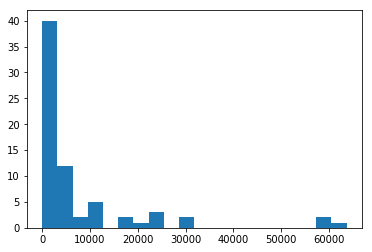

In [8]:
plt.hist(bd_flw, 20)

# Tweet Favorites Analysis

In [9]:
df_tweets = pd.read_excel(data_path+ipt_file2)
df_tweets.head()

,Business_id,twitter_account,tweet_id,created_at,retweet_count,favorite_count,lang,text
0,_v7lMUtdd6WlgKUEBLA_VA,@DonRamons,1029239981104017408,2018-08-14 05:35:08,179,0,en,RT @SFGiants: Let those feelings out\n\n #Beat...
1,_v7lMUtdd6WlgKUEBLA_VA,@DonRamons,1008148314599010304,2018-06-17 00:44:23,0,1,en,@amymarquez Yeah! Enjoy 🌮🥑🍹
2,_v7lMUtdd6WlgKUEBLA_VA,@DonRamons,903591448792195073,2017-09-01 12:12:43,1,2,en,#Margarita ☀️🔥holiday weekend loooonng lunch k...
3,_v7lMUtdd6WlgKUEBLA_VA,@DonRamons,895171391590477825,2017-08-09 06:34:25,2,1,en,#Fogust ☀️🥑🌮🍹#SpiceItUp Enjoy #SanFrancisco be...
4,_v7lMUtdd6WlgKUEBLA_VA,@DonRamons,890903925737566208,2017-07-28 11:57:02,3,2,en,Enjoy #summer 🥑🌮☀️#SanFrancisco #tacos #comfo...


In [10]:
# groupby outputs without an unpredicted order
sum_tweet_retweeted = df_tweets.groupby("Business_id")["retweet_count"].sum()
sum_tweet_favorited = df_tweets.groupby("Business_id")["favorite_count"].sum()

df_sum_user_popularity = pd.DataFrame({"sum_tweet_retweeted": sum_tweet_retweeted,
                                        "sum_tweet_favorited": sum_tweet_favorited
                                       })
# Ordering
sum_tweet_retweeted = []
sum_tweet_favorited = []
for bid in tw_business_id:
    sum_tweet_retweeted.append(df_sum_user_popularity.loc[bid].sum_tweet_retweeted)
    sum_tweet_favorited.append(df_sum_user_popularity.loc[bid].sum_tweet_favorited)

df_favorites = pd.DataFrame({"Business_id"     : tw_business_id,
                             "twitter_account" : tw_accounts,
                             #"sum_tweet_retweeted" : sum_tweet_retweeted,
                             "sum_favorites" : sum_tweet_favorited
                             })

df_favorites.head()

,Business_id,twitter_account,sum_favorites
0,_v7lMUtdd6WlgKUEBLA_VA,@DonRamons,100
1,_VHU9KZUHRLp2Hc2JOKlYg,@CioppinoPGH,137
2,_Vi33ZAf0hdBn5Cu0AnQig,@ZoesKitchen,198
3,-2Arz8twKJmxHMS3Sv-TeA,@SteepNBrewWest,49
4,-49WY_TEa9ZEcRk_GnuLog,@CrackerBarrel,2657


In [11]:
fav_80 = df_favorites["sum_favorites"].tolist()
bd_fav, del_id_fav = func_scaling(fav_80, tw_business_id)
print(len(bd_fav), len(del_id_fav))

72 8


(array([17., 14.,  5.,  1.,  5.,  7.,  3.,  4.,  1.,  3.,  2.,  3.,  0.,
         1.,  1.,  2.,  1.,  0.,  1.,  1.]),
 array([   0. ,   66.3,  132.6,  198.9,  265.2,  331.5,  397.8,  464.1,
         530.4,  596.7,  663. ,  729.3,  795.6,  861.9,  928.2,  994.5,
        1060.8, 1127.1, 1193.4, 1259.7, 1326. ]),
 <a list of 20 Patch objects>)

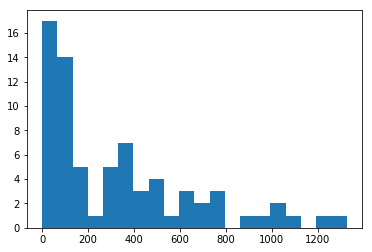

In [12]:
plt.hist(bd_fav, 20)

# Twitter Boxplots

In [13]:
df_twitter = pd.DataFrame({"Business_id"     : tw_business_id,
                           "twitter_account" : tw_accounts,
                           "followers"       : flw_80, 
                         })

In [14]:
mean_flw = np.mean(bd_flw)
std_flw  = np.std(bd_flw)
df_twitter["scaled_followers"] = (df_twitter["followers"] - mean_flw) / std_flw

In [15]:
df_twitter["favorites_sum"] = fav_80

In [16]:
mean_fav = np.mean(bd_fav)
std_fav  = np.std(bd_fav)
df_twitter["scaled_favorites_sum"] = (df_twitter["favorites_sum"] - mean_fav) / std_fav

In [17]:
df_twitter.head()

,Business_id,twitter_account,followers,scaled_followers,favorites_sum,scaled_favorites_sum
0,_v7lMUtdd6WlgKUEBLA_VA,@DonRamons,244,-0.553115,100,-0.695256
1,_VHU9KZUHRLp2Hc2JOKlYg,@CioppinoPGH,914,-0.502814,137,-0.583458
2,_Vi33ZAf0hdBn5Cu0AnQig,@ZoesKitchen,22946,1.151260,198,-0.399142
3,-2Arz8twKJmxHMS3Sv-TeA,@SteepNBrewWest,112,-0.563025,49,-0.849356
4,-49WY_TEa9ZEcRk_GnuLog,@CrackerBarrel,119240,8.380629,2657,7.030912


In [18]:
mean_flw = np.mean(bd_flw)
std_flw  = np.std(bd_flw)
plt_flw = (bd_flw - mean_flw)/std_flw

In [19]:
mean_fav = np.mean(bd_fav)
std_fav  = np.std(bd_fav)
plt_fav = (bd_fav - mean_fav)/std_fav

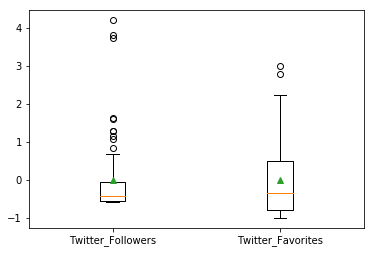

In [20]:
plt.boxplot([plt_flw, plt_fav], 
            labels=["Twitter_Followers", "Twitter_Favorites"],
            showmeans=True)
plt.savefig(data_path+"blt_fw_fv.png")

# Yelp Boxplots of Reviews & Checkins

In [21]:
df_yelp = pd.read_excel(data_path+ipt_file3)
df_yelp.head()

,business_id,review_count,scaled.reviews,review.Rank,sum.checkin.,scaled.checkin,checkinRank,stars
1,_v7lMUtdd6WlgKUEBLA_VA,70,-0.424112,40.0,148,-0.436355,32.0,4.0
2,_VHU9KZUHRLp2Hc2JOKlYg,152,-0.355645,51.0,394,-0.373916,48.0,4.0
3,_Vi33ZAf0hdBn5Cu0AnQig,36,-0.452501,27.0,44,-0.462752,16.5,4.0
4,-2Arz8twKJmxHMS3Sv-TeA,24,-0.462521,18.0,82,-0.453107,25.0,3.5
5,-49WY_TEa9ZEcRk_GnuLog,31,-0.456676,24.0,164,-0.432294,35.0,3.5


In [22]:
yelp_id = df_yelp["business_id"].tolist()

In [23]:
dup = {}
for bid in tw_business_id:
    if bid in dup:
        dup[bid] += 1
    else:
        dup[bid] = 1

for bid in dup:
    if dup[bid] != 1:
        print(bid)
        
for yid in yelp_id:
    if yid in dup:
        dup[yid] -= 1
    else:
        print(yid)

for bid in dup:
    if dup[bid] != 0:
        print(bid)
        
print("DUP Check Over")

DUP Check Over


In [24]:
rvw_80 = df_yelp["review_count"].tolist()
ckn_80 = df_yelp["sum.checkin."].tolist()

(array([63.,  7.,  2.,  5.,  0.,  1.,  1.,  0.,  0.,  1.]),
 array([3.0000e+00, 7.3880e+02, 1.4746e+03, 2.2104e+03, 2.9462e+03,
        3.6820e+03, 4.4178e+03, 5.1536e+03, 5.8894e+03, 6.6252e+03,
        7.3610e+03]),
 <a list of 10 Patch objects>)

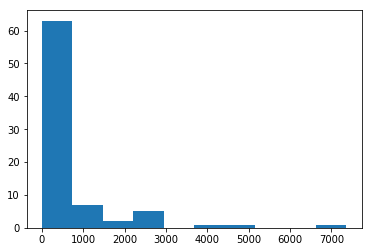

In [25]:
plt.hist(rvw_80)

(array([62.,  8.,  2.,  1.,  2.,  0.,  1.,  2.,  1.,  1.]),
 array([2.00000e+00, 1.91560e+03, 3.82920e+03, 5.74280e+03, 7.65640e+03,
        9.57000e+03, 1.14836e+04, 1.33972e+04, 1.53108e+04, 1.72244e+04,
        1.91380e+04]),
 <a list of 10 Patch objects>)

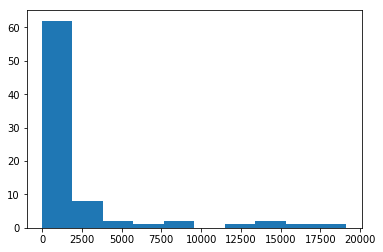

In [26]:
plt.hist(ckn_80)

In [27]:
bd_rvw, del_id_rvw = func_scaling(rvw_80, yelp_id)
print(len(bd_rvw), len(del_id_rvw))

68 12


In [28]:
bd_ckn, del_id_ckn = func_scaling(ckn_80, yelp_id)
print(len(bd_ckn), len(del_id_ckn))

70 10


In [29]:
mean_rvw = np.mean(bd_rvw)
std_rvw  = np.std(bd_rvw)
plt_rvw = (bd_rvw - mean_rvw)/std_rvw

In [30]:
mean_ckn = np.mean(bd_ckn)
std_ckn  = np.std(bd_ckn)
plt_ckn = (bd_ckn - mean_ckn)/std_ckn

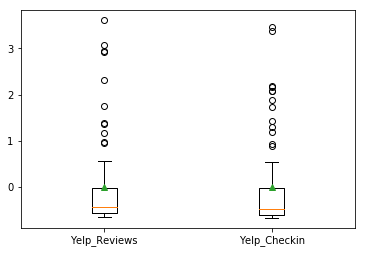

In [31]:
plt.boxplot([plt_rvw, plt_ckn], 
            labels=["Yelp_Reviews", "Yelp_Checkin"],
            showmeans=True)
plt.savefig(data_path+"blt_rv_ck.png")

# Yelp Ratings

(array([ 2., 16., 27., 29.,  6.]),
 array([2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 5 Patch objects>)

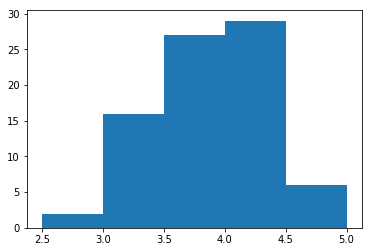

In [32]:
rating_80 = df_yelp["stars"].tolist()
plt.hist(rating_80, 5)

In [33]:
mean_rating = np.mean(rating_80)
std_rating  = np.std(rating_80)
plt_rating = (rating_80 - mean_rating)/std_rating

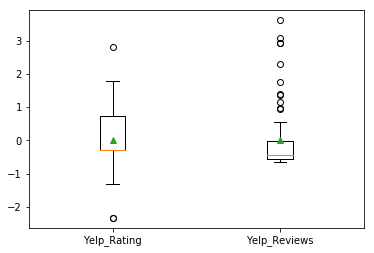

In [34]:
plt.boxplot([plt_rating, plt_rvw],
            labels=["Yelp_Rating", "Yelp_Reviews"],
            showmeans=True)
plt.savefig(data_path+"blt_rt_rv.png")

In [35]:
mean_rating

3.6375

# Yelp.Reviews v. Twitter.Followers

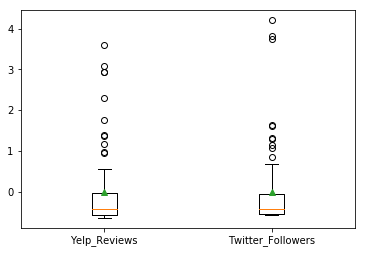

In [36]:
plt.boxplot([plt_rvw, plt_flw], 
            labels=["Yelp_Reviews", "Twitter_Followers"],
            showmeans=True)
plt.savefig(data_path+"blt_rv_fw.png")

# Yelp.Rating v. Twitter.Favorites

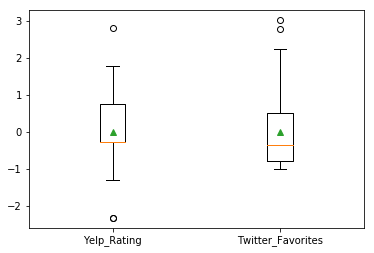

In [37]:
plt.boxplot([plt_rating, plt_fav], 
            labels=["Yelp_Rating", "Twitter_Favorites"],
            showmeans=True)
plt.savefig(data_path+"blt_rt_fv.png")

# Merge with the same IDs

In [38]:
df_rating_ordered = df_yelp.sort_values(["stars"], ascending=False)[["business_id", "stars"]]
df_rating_ordered.head()

,business_id,stars
78,Xg5qEQiB-7L6kGJ5F4K3bQ,5.0
35,faPVqws-x-5k2CQKDNtHxw,4.5
28,0d0i0FaJq1GIeW1rS2D-5w,4.5
29,2iTsRqUsPGRH1li1WVRvKQ,4.5
30,3BCsAgo_1i4xMuTyLKMLRQ,4.5


In [39]:
stars = df_rating_ordered["stars"].tolist()
df_rating_ordered["Yelp_ratings_scaled"] = (stars - np.mean(stars)) / np.std(stars)
df_rating_ordered.head()

,business_id,stars,Yelp_ratings_scaled
78,Xg5qEQiB-7L6kGJ5F4K3bQ,5.0,2.796711
35,faPVqws-x-5k2CQKDNtHxw,4.5,1.770395
28,0d0i0FaJq1GIeW1rS2D-5w,4.5,1.770395
29,2iTsRqUsPGRH1li1WVRvKQ,4.5,1.770395
30,3BCsAgo_1i4xMuTyLKMLRQ,4.5,1.770395


In [40]:
bid_ordered = df_rating_ordered["business_id"].tolist()

In [41]:
tw_favs = []
for bid in bid_ordered:
    fav = df_favorites.loc[df_favorites["Business_id"]==bid, "sum_favorites"].tolist()[0]
    tw_favs.append(fav)

df_rating_ordered["favorites"] = tw_favs
df_rating_ordered["Twitter_favorites_scaled"] = (df_rating_ordered["favorites"] - mean_fav) / std_fav

df_rating_ordered = df_rating_ordered.reset_index(drop=True)
df_rating_ordered.head()

,business_id,stars,Yelp_ratings_scaled,favorites,Twitter_favorites_scaled
0,Xg5qEQiB-7L6kGJ5F4K3bQ,5.0,2.796711,318,-0.036553
1,faPVqws-x-5k2CQKDNtHxw,4.5,1.770395,1021,2.087615
2,0d0i0FaJq1GIeW1rS2D-5w,4.5,1.770395,474,0.434813
3,2iTsRqUsPGRH1li1WVRvKQ,4.5,1.770395,394,0.193087
4,3BCsAgo_1i4xMuTyLKMLRQ,4.5,1.770395,613,0.854812


In [42]:
yp_rvws = []
for bid in bid_ordered:
    rvw = df_yelp.loc[df_yelp["business_id"]==bid, "review_count"].tolist()[0]
    yp_rvws.append(rvw)

df_rating_ordered["reviews"] = yp_rvws
df_rating_ordered["Yelp_reviews_scaled"] = (df_rating_ordered["reviews"] - mean_rvw) / std_rvw
df_rating_ordered.head()

,business_id,stars,Yelp_ratings_scaled,favorites,Twitter_favorites_scaled,reviews,Yelp_reviews_scaled
0,Xg5qEQiB-7L6kGJ5F4K3bQ,5.0,2.796711,318,-0.036553,1463,5.125970
1,faPVqws-x-5k2CQKDNtHxw,4.5,1.770395,1021,2.087615,2360,8.674330
2,0d0i0FaJq1GIeW1rS2D-5w,4.5,1.770395,474,0.434813,907,2.926541
3,2iTsRqUsPGRH1li1WVRvKQ,4.5,1.770395,394,0.193087,1586,5.612535
4,3BCsAgo_1i4xMuTyLKMLRQ,4.5,1.770395,613,0.854812,1741,6.225685


In [43]:
tw_flw = []
for bid in bid_ordered:
    flw = df_users.loc[df_users["Business_id"]==bid, "followers_count"].tolist()[0]
    tw_flw.append(flw)

df_rating_ordered["followers"] = tw_flw
df_rating_ordered["Twitter_followers_scaled"] = (df_rating_ordered["followers"] - mean_flw) / std_flw
df_rating_ordered.head()

,business_id,stars,Yelp_ratings_scaled,favorites,Twitter_favorites_scaled,reviews,Yelp_reviews_scaled,followers,Twitter_followers_scaled
0,Xg5qEQiB-7L6kGJ5F4K3bQ,5.0,2.796711,318,-0.036553,1463,5.125970,1720,-0.442303
1,faPVqws-x-5k2CQKDNtHxw,4.5,1.770395,1021,2.087615,2360,8.674330,5450,-0.162269
2,0d0i0FaJq1GIeW1rS2D-5w,4.5,1.770395,474,0.434813,907,2.926541,2873,-0.355740
3,2iTsRqUsPGRH1li1WVRvKQ,4.5,1.770395,394,0.193087,1586,5.612535,1335,-0.471207
4,3BCsAgo_1i4xMuTyLKMLRQ,4.5,1.770395,613,0.854812,1741,6.225685,3423,-0.314448


In [44]:
len(df_rating_ordered)

80

In [45]:
for index, row in df_rating_ordered.iterrows():
    bid = row["business_id"]
    if (bid in del_id_flw) or (bid in del_id_fav) or (bid in del_id_rvw):
        #df_rating_ordered = df_rating_ordered.drop(df_rating_ordered.index[index])
        df_rating_ordered.iloc[index, 0] = np.nan

df_rating_ordered = df_rating_ordered.dropna(how='any')
len(df_rating_ordered)

57

In [46]:
df_rating_ordered = df_rating_ordered.reset_index(drop=True)
df_rating_ordered.head()

,business_id,stars,Yelp_ratings_scaled,favorites,Twitter_favorites_scaled,reviews,Yelp_reviews_scaled,followers,Twitter_followers_scaled
0,0d0i0FaJq1GIeW1rS2D-5w,4.5,1.770395,474,0.434813,907,2.926541,2873,-0.355740
1,qdHFUvFhZjvNie3cZiJb9w,4.0,0.744079,31,-0.903745,461,1.162251,3596,-0.301460
2,_v7lMUtdd6WlgKUEBLA_VA,4.0,0.744079,100,-0.695256,70,-0.384470,244,-0.553115
3,QcUKFdAWxFq42-zE96cS-A,4.0,0.744079,333,0.008771,30,-0.542702,7059,-0.041472
4,lwxYmWqjmEZ0ukCsXC9Pfg,4.0,0.744079,456,0.380425,517,1.383776,28978,1.604119


# Yelp.Rating v. Twitter.Favorites

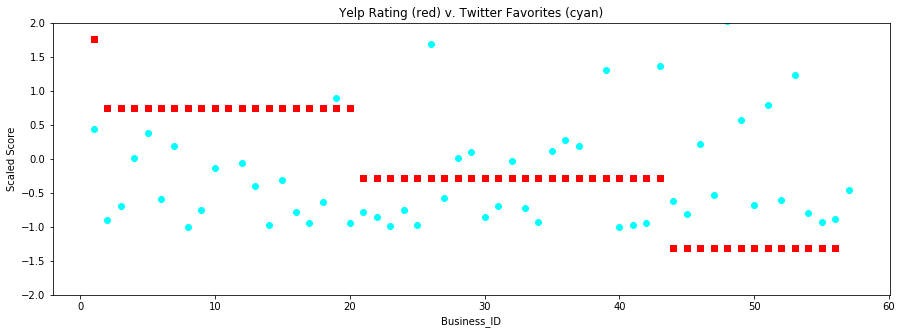

In [47]:
x_axis = np.arange(1, len(df_rating_ordered["business_id"])+1, 1)

plt.figure(figsize=(15,5))
plt.scatter(x_axis, df_rating_ordered["Yelp_ratings_scaled"],
            marker="s", color="red")
plt.scatter(x_axis, df_rating_ordered["Twitter_favorites_scaled"],
            marker="o", color="cyan")

plt.title("Yelp Rating (red) v. Twitter Favorites (cyan)")
plt.xlabel("Business_ID")
plt.ylabel("Scaled Score")
plt.ylim(-2, 2)

plt.savefig(data_path+"y.rt_t.fv.png")
plt.show()

In [48]:
sum((df_rating_ordered["Yelp_ratings_scaled"] - df_rating_ordered["Twitter_favorites_scaled"])**2)

94.63845088300191

In [49]:
count=0
for idx in x_axis:
    if np.abs(df_rating_ordered["Yelp_ratings_scaled"][idx-1] - 
              df_rating_ordered["Twitter_favorites_scaled"][idx-1]) < 0.2:
        count+=1
count/len(x_axis)

0.017543859649122806

In [50]:
count=0
for idx in x_axis:
    if np.abs(df_rating_ordered["Yelp_ratings_scaled"][idx-1] - 
              df_rating_ordered["Twitter_favorites_scaled"][idx-1]) < 0.5:
        count+=1
count/len(x_axis)

0.24561403508771928

# Yelp.Rating v. Twitter.Followers

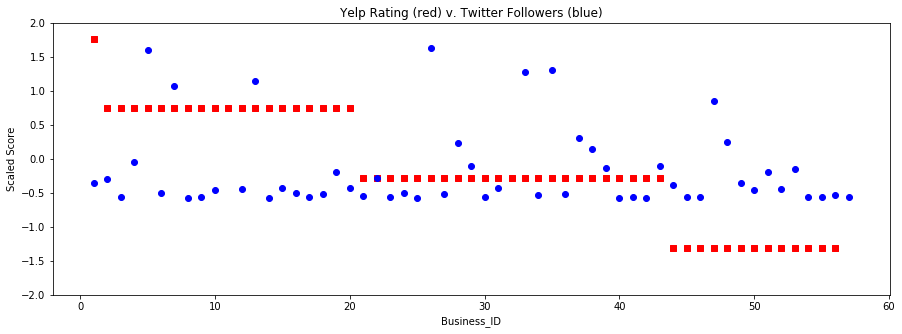

In [51]:
plt.figure(figsize=(15,5))
plt.scatter(x_axis, df_rating_ordered["Yelp_ratings_scaled"],
            marker="s", color="red")
plt.scatter(x_axis, df_rating_ordered["Twitter_followers_scaled"],
            marker="o", color="blue")

plt.title("Yelp Rating (red) v. Twitter Followers (blue)")
plt.xlabel("Business_ID")
plt.ylabel("Scaled Score")
plt.ylim(-2, 2)

plt.savefig(data_path+"y.rt_t.fw.png")
plt.show()

In [52]:
sum((df_rating_ordered["Yelp_ratings_scaled"] - df_rating_ordered["Twitter_followers_scaled"])**2)

84.52124514469243

In [53]:
count=0
for idx in x_axis:
    if np.abs(df_rating_ordered["Yelp_ratings_scaled"][idx-1] - 
              df_rating_ordered["Twitter_followers_scaled"][idx-1]) < 0.2:
        count+=1
count/len(x_axis)

0.08771929824561403

In [54]:
count=0
for idx in x_axis:
    if np.abs(df_rating_ordered["Yelp_ratings_scaled"][idx-1] - 
              df_rating_ordered["Twitter_followers_scaled"][idx-1]) < 0.5:
        count+=1
count/len(x_axis)

0.3333333333333333

# Yelp.Ratings v. Yelp.Reviews

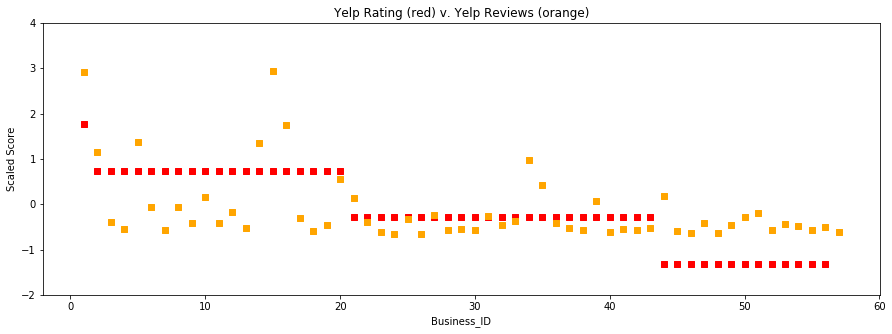

In [55]:
plt.figure(figsize=(15,5))
plt.scatter(x_axis, df_rating_ordered["Yelp_ratings_scaled"],
            marker="s", color="red")
plt.scatter(x_axis, df_rating_ordered["Yelp_reviews_scaled"],
            marker="s", color="orange")

plt.title("Yelp Rating (red) v. Yelp Reviews (orange)")
plt.xlabel("Business_ID")
plt.ylabel("Scaled Score")
plt.ylim(-2, 4)

plt.savefig(data_path+"y.rt_y.rv.png")
plt.show()

In [56]:
sum((df_rating_ordered["Yelp_ratings_scaled"] - df_rating_ordered["Yelp_reviews_scaled"])**2)

41.04939532500863

In [57]:
count=0
for idx in x_axis:
    if np.abs(df_rating_ordered["Yelp_ratings_scaled"][idx-1] - 
              df_rating_ordered["Yelp_reviews_scaled"][idx-1]) < 0.2:
        count+=1
count/len(x_axis)

0.14035087719298245

In [58]:
count=0
for idx in x_axis:
    if np.abs(df_rating_ordered["Yelp_ratings_scaled"][idx-1] - 
              df_rating_ordered["Yelp_reviews_scaled"][idx-1]) < 0.5:
        count+=1
count/len(x_axis)

0.40350877192982454

# Yelp.Reviews v. Twitter.Followers

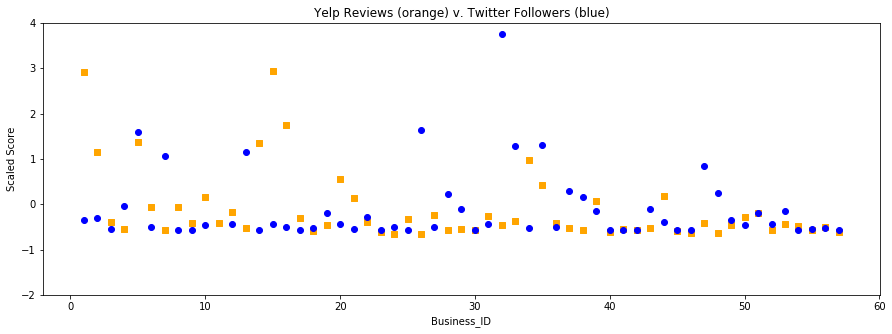

In [59]:
plt.figure(figsize=(15,5))
plt.scatter(x_axis, df_rating_ordered["Yelp_reviews_scaled"],
            marker="s", color="orange")
plt.scatter(x_axis, df_rating_ordered["Twitter_followers_scaled"],
            marker="o", color="blue")

plt.title("Yelp Reviews (orange) v. Twitter Followers (blue)")
plt.xlabel("Business_ID")
plt.ylabel("Scaled Score")
plt.ylim(-2, 4)

plt.savefig(data_path+"y.rv_t.fw.png")
plt.show()

In [60]:
sum((df_rating_ordered["Yelp_reviews_scaled"] - df_rating_ordered["Twitter_followers_scaled"])**2)

96.85161688903123

In [61]:
count=0
for idx in x_axis:
    if np.abs(df_rating_ordered["Yelp_reviews_scaled"][idx-1] - 
              df_rating_ordered["Twitter_followers_scaled"][idx-1]) < 0.2:
        count+=1
count/len(x_axis)

0.38596491228070173

In [62]:
count=0
for idx in x_axis:
    if np.abs(df_rating_ordered["Yelp_reviews_scaled"][idx-1] - 
              df_rating_ordered["Twitter_followers_scaled"][idx-1]) < 0.5:
        count+=1
count/len(x_axis)    

0.5789473684210527

# Yelp.Reviews v. Twitter.Favorites

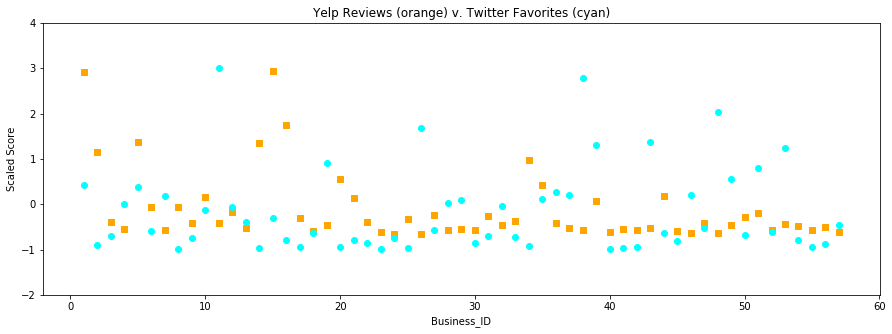

In [63]:
plt.figure(figsize=(15,5))
plt.scatter(x_axis, df_rating_ordered["Yelp_reviews_scaled"],
            marker="s", color="orange")
plt.scatter(x_axis, df_rating_ordered["Twitter_favorites_scaled"],
            marker="o", color="cyan")

plt.title("Yelp Reviews (orange) v. Twitter Favorites (cyan)")
plt.xlabel("Business_ID")
plt.ylabel("Scaled Score")
plt.ylim(-2, 4)

plt.savefig(data_path+"y.rv_t.fv.png")
plt.show()

In [64]:
sum((df_rating_ordered["Yelp_reviews_scaled"] - df_rating_ordered["Twitter_favorites_scaled"])**2)

96.43082540094927

In [65]:
count=0
for idx in x_axis:
    if np.abs(df_rating_ordered["Yelp_reviews_scaled"][idx-1] - 
              df_rating_ordered["Twitter_favorites_scaled"][idx-1]) < 0.2:
        count+=1
count/len(x_axis)    

0.12280701754385964

In [66]:
count=0
for idx in x_axis:
    if np.abs(df_rating_ordered["Yelp_reviews_scaled"][idx-1] - 
              df_rating_ordered["Twitter_favorites_scaled"][idx-1]) < 0.5:
        count+=1
count/len(x_axis)    

0.45614035087719296

# Twitter.Followers v. Twitter.Favorites

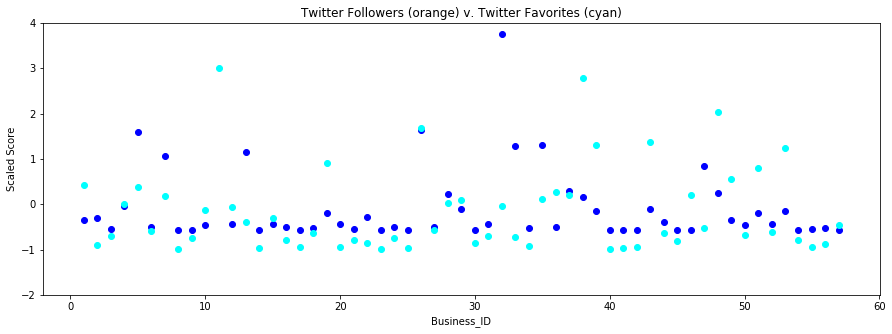

In [67]:
plt.figure(figsize=(15,5))
plt.scatter(x_axis, df_rating_ordered["Twitter_followers_scaled"],
            marker="o", color="blue")
plt.scatter(x_axis, df_rating_ordered["Twitter_favorites_scaled"],
            marker="o", color="cyan")

plt.title("Twitter Followers (orange) v. Twitter Favorites (cyan)")
plt.xlabel("Business_ID")
plt.ylabel("Scaled Score")
plt.ylim(-2, 4)

plt.savefig(data_path+"t.fw_t.fv.png")
plt.show()

In [68]:
sum((df_rating_ordered["Twitter_followers_scaled"] - df_rating_ordered["Twitter_favorites_scaled"])**2)

52.784220951420785

In [69]:
count=0
for idx in x_axis:
    if np.abs(df_rating_ordered["Twitter_followers_scaled"][idx-1] - 
              df_rating_ordered["Twitter_favorites_scaled"][idx-1]) < 0.2:
        count+=1
count/len(x_axis)

0.19298245614035087

In [70]:
count=0
for idx in x_axis:
    if np.abs(df_rating_ordered["Twitter_followers_scaled"][idx-1] - 
              df_rating_ordered["Twitter_favorites_scaled"][idx-1]) < 0.5:
        count+=1
count/len(x_axis)

0.6140350877192983

# Yelp.Rating v. Twitter.Followers & Favorites

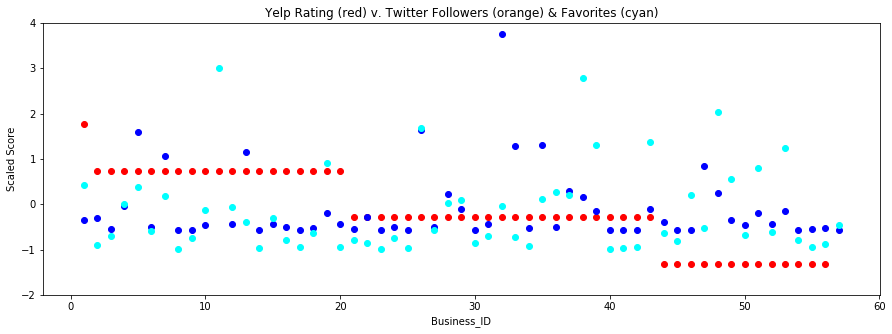

In [71]:
plt.figure(figsize=(15,5))
plt.scatter(x_axis, df_rating_ordered["Yelp_ratings_scaled"],
            marker="o", color="red")

plt.scatter(x_axis, df_rating_ordered["Twitter_followers_scaled"],
            marker="o", color="blue")
plt.scatter(x_axis, df_rating_ordered["Twitter_favorites_scaled"],
            marker="o", color="cyan")

plt.title("Yelp Rating (red) v. Twitter Followers (orange) & Favorites (cyan)")
plt.xlabel("Business_ID")
plt.ylabel("Scaled Score")
plt.ylim(-2, 4)

plt.savefig(data_path+"y.rt_t.fwfv.png")
plt.show()

In [72]:
list3 = ["4JNXUYY8wbaaDmk3BPzlWw", "f4x1YBxkLrZg652xt2KR5g", "faPVqws-x-5k2CQKDNtHxw"]
for a in list3:
    if a in df_rating_ordered["business_id"].tolist():
        print(a)